Import

In [13]:
from flask import Flask, request

ModuleNotFoundError: No module named 'flask'

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [14]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/featuresfloatvf.csv')
data =data.drop('Unnamed: 0', axis=1)
# x=data.loc[:,['statuses' , 'date_joined' , 'most_recent_post' , 'following' , 'followers' , 'likes', 'retweet' , 'retweeted_count'  ,'avg_tweets_by_hour_of_day', 'avg_tweets_by_day_of_week']]
x=data.iloc[:, :-1]
y = data.account_type.values.tolist()

In [15]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Fit the scaler to your data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train the Suppport Vector Machines model

In [16]:
svc =  SVC() 
svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.8430681818181818
Testing Accuracy score: 0.8327272727272728


Calculate the accuracy of the model

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  y_pred_test)


0.8076075782053165


Training Accuracy score: 0.8430681818181818
Testing Accuracy score: 0.8327272727272728
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2156
           1       0.83      0.85      0.84      2244

    accuracy                           0.83      4400
   macro avg       0.83      0.83      0.83      4400
weighted avg       0.83      0.83      0.83      4400



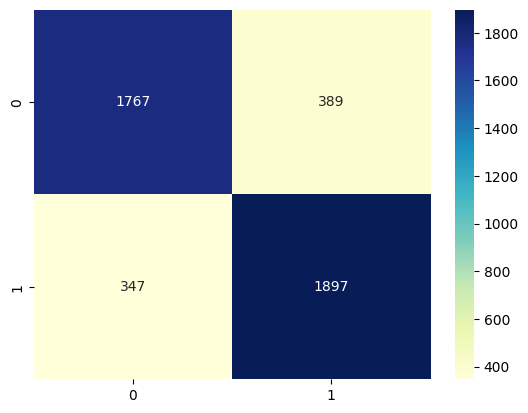

In [17]:
svc =  SVC() 
svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
